In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

#helping functions

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

In [3]:
path_file = "./../output/mnist/z_ass/"
wpoint_files = "wPCA_LR_G10_partition_noniid_C1_nclient10.npy"
wpoint_files = "wTSNE_LR_G10_partition_noniid_C1_nclient10.npy"
model_files = "weight_LR_G100_partition_noniid_C1_nclient10.npy"
distance_files = "d_minkowski_p1.0_LR_G10_partition_noniid_C1_nclient10.npy"

distance_euclidean_files = "d_euclidean_LR_G100_partition_noniid_C1_nclient10.npy"

dfp = pd.read_csv(path_file + wpoint_files)
dfmodel = pd.read_csv(path_file + model_files)
dfdistance = pd.read_csv(path_file + distance_files, header = None)
dfdistance_euclidean = pd.read_csv(path_file + distance_euclidean_files, header = None)


print(dfmodel.shape)
dfmodel = dfmodel.drop(['1'], axis = 1)
print(dfmodel.values.shape)
#dfmodel.head()

print("dfdistance: shape")
print(dfdistance.shape)
dfdistance.head()





(10, 785)
(10, 784)
dfdistance: shape
(10, 10)


0           1           2           3           4           5  \
0    0.000000  120.269385  175.068788  104.879068  119.278344  163.963335   
1  120.269385    0.000000  172.612723   99.778830   93.503520  197.876624   
2  175.068788  172.612723    0.000000  147.813544  196.439143  192.786759   
3  104.879068   99.778830  147.813544    0.000000  146.630816  175.730891   
4  119.278344   93.503520  196.439143  146.630816    0.000000  192.170112   

            6           7           8           9  
0  131.476917  189.864371  117.798022  121.305221  
1   91.489423  165.143456   38.236998   64.254985  
2  170.278174  217.436596  188.660293  179.821792  
3  123.865810  183.175981   92.395671  102.894674  
4  108.608838  182.340266   91.753938   99.890213

In [4]:
#load mnist data and PCA

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

tsne = TSNE(n_components = 2, init = "random", learning_rate = "auto", random_state = 42)
mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:5000], mnist.target[:5000]

In [5]:
#X_train = StandardScaler().fit_transform(X_train)

#normalize the models in the range 0..255
max_value, min_value = np.max(np.max(dfmodel.values)), np.min(np.min(dfmodel.values))

model_normed = dfmodel.values * 255 / (max_value - min_value)

print("models: max_value", np.max(np.max(model_normed)))
print("models: min_value", np.min(np.min(model_normed)))

all_transformed = tsne.fit_transform(np.concatenate((X_train, model_normed), axis = 0))
print(all_transformed.shape)

X_train2D, model2D = all_transformed[:5000], all_transformed[5000:]

models: max_value 249.67399250258404
models: min_value -5.326007497415944
(5010, 2)


In [6]:
print(X_train2D.shape, model2D.shape)

(5000, 2) (10, 2)


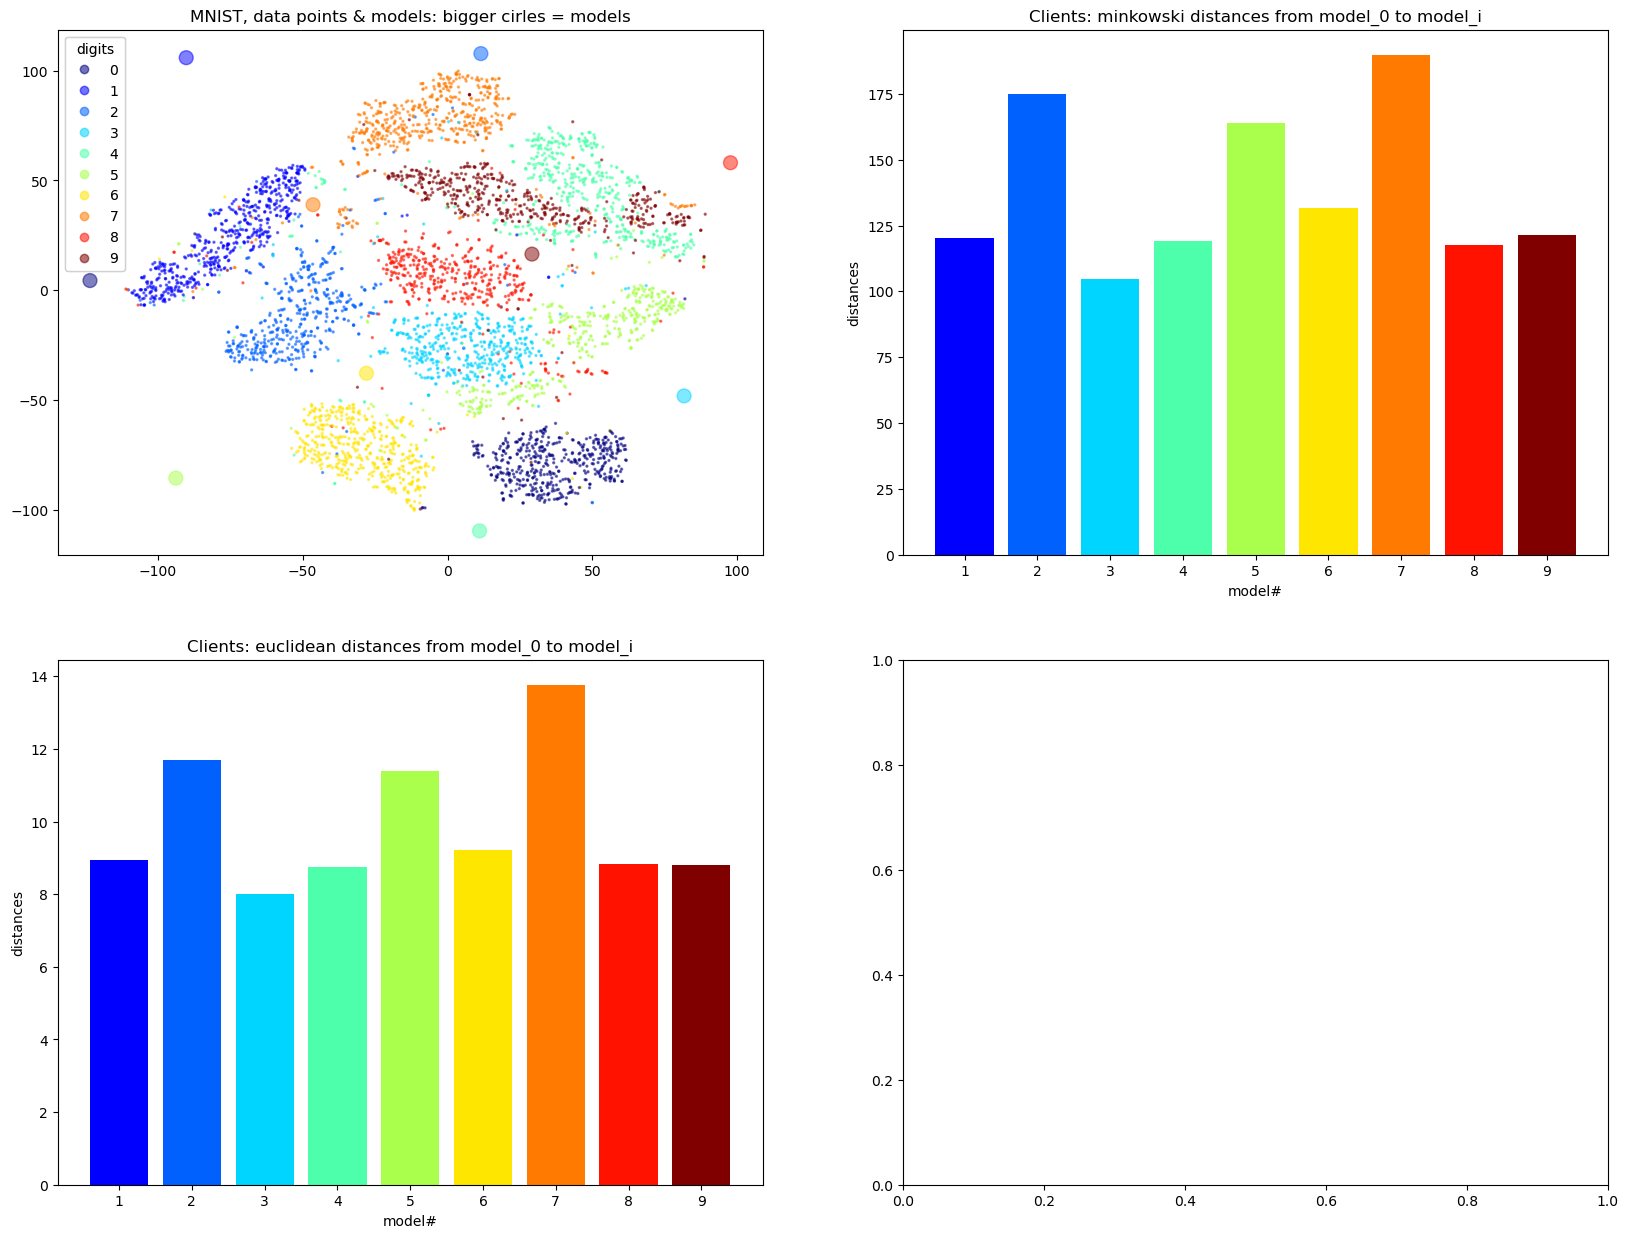

In [7]:
#fig, axs = plt.subplots(n_zfiles+1, n_pfiles, figsize=(20,15))
fig, axs = plt.subplots(2,2, figsize=(20,15))


rangex, rangey = 200,200
minx_data, maxx_data = min(X_train2D[:,0]), max(X_train2D[:, 0])
miny_data, maxy_data = min(X_train2D[:,1]), max(X_train2D[:, 1])

minx_model, maxx_model = min(dfp["pc1"]), max(dfp["pc1"])
miny_model, maxy_model = min(dfp["pc2"]), max(dfp["pc2"])


maxx_value, minx_value = np.max(model2D[:,0]), np.min(model2D[:,0])
maxy_value, miny_value = np.max(model2D[:,1]), np.min(model2D[:,1])


axs[0,0].set_title("MNIST, data points & models: bigger cirles = models") #random assignment


scatters = axs[0,0].scatter(X_train2D[:, 0] * (rangex) / (maxx_data - minx_data), X_train2D[:, 1] *(rangey) / (maxy_data - miny_data), s= 2, c = y_train.astype(np.int8), cmap = "jet", alpha = 0.5)

axs[0,0].scatter(dfp['pc1'], dfp['pc2'], s= 100, c = range(10), cmap = "jet", alpha = 0.5)# c=noniid82_label2[:,0]) , c = dfz[1]

#axs[0,1].scatter(model2D[:,0] * rangex/(maxx_value - minx_value), model2D[:,1]*rangey/(maxy_value - miny_value), s= 100, c = range(10), cmap = "jet", alpha = 0.5)# c=noniid82_label2[:,0]) , c = dfz[1]

legend1 = axs[0,0].legend(*scatters.legend_elements(),loc="upper left", title="digits")
axs[0,0].add_artist(legend1)


cl = [scatters.to_rgba(i) for i in range(1,10)]

axs[0,1].set_title("Clients: minkowski distances from model_0 to model_i") #metis assignment
axs[0,1].bar(range(1, 10), dfdistance.values[0,1:], color = cl)
axs[0,1].set_xticks(range(1,10), range(1,10))
axs[0,1].set_ylabel("distances")
axs[0,1].set_xlabel("model#")

axs[1,0].set_title("Clients: euclidean distances from model_0 to model_i") #metis assignment
axs[1,0].bar(range(1, 10), dfdistance_euclidean.values[0,1:], color = cl)
axs[1,0].set_xticks(range(1,10), range(1,10))
axs[1,0].set_ylabel("distances")
axs[1,0].set_xlabel("model#")

        
plt.show()

In [8]:
fig, ax = plt.subplots(figsize=(20,15))


rangex, rangey = 200,200
minx_data, maxx_data = min(X_train2D[:,0]), max(X_train2D[:, 0])
miny_data, maxy_data = min(X_train2D[:,1]), max(X_train2D[:, 1])

minx_model, maxx_model = min(dfp["pc1"]), max(dfp["pc1"])
miny_model, maxy_model = min(dfp["pc2"]), max(dfp["pc2"])


maxx_value, minx_value = np.max(model2D[:,0]), np.min(model2D[:,0])
maxy_value, miny_value = np.max(model2D[:,1]), np.min(model2D[:,1])


ax.set_title("MNIST, data points & models: bigger cirles = models") #random assignment


scatters = ax.scatter(X_train2D[:, 0] * (rangex) / (maxx_data - minx_data), X_train2D[:, 1] *(rangey) / (maxy_data - miny_data), s= 2, c = y_train.astype(np.int8), cmap = "jet", alpha = 0.5)

ax.set_title("Clients: models") #metis assignment
ax.scatter(dfp['pc1'], dfp['pc2'], s= 100, c = range(10), cmap = "jet", alpha = 0.5)# c=noniid82_label2[:,0]) , c = dfz[1]

ax.scatter(model2D[:,0] * rangex/(maxx_value - minx_value), model2D[:,1]*rangey/(maxy_value - miny_value), s= 100, c = range(10), cmap = "jet", alpha = 0.5)# c=noniid82_label2[:,0]) , c = dfz[1]

legend1 = ax.legend(*scatters.legend_elements(loc="upper left", title="digits")
ax.add_artist(legend1)

        
plt.show()

SyntaxError: invalid syntax (566564329.py, line 27)

In [ ]:

plot_digits(X_train2D, y_train.astype(np.int8))

In [ ]:
zfiles[0][1]

In [ ]:
n_pfiles

In [ ]:
n_zfiles

In [ ]:
print(X_train.shape)

In [ ]:
print(X_train[:10][:5])

In [ ]:
type(X_train[0][0])

In [ ]:
a = np.asarray([[1.123, 1], [3.8312, 4]], dtype='float')
b = np.asarray([[1, 1]], dtype='float')
print(np.concatenate((a,b), axis=0))

In [ ]:
print(np.max(np.max(dfmodel.values)))
print(np.min(np.min(dfmodel.values)))

print(np.max(np.max(X_train)))
print(np.min(np.min(X_train)))


print(max(dfmodel.values))
print(np.min(np.min(dfmodel.values)))

